In [ ]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requir

In [ ]:
# Imported necess. librar.

import pandas as pad
# imported for dta manipula. and analy.

import re
# imported for regular express.

from bs4 import BeautifulSoup
#  imported for parsing Html and Xml docum.

import matplotlib.pyplot as mtplot
 # imported for creating static, animated, and intera. visualiza.

import seaborn as sbs
 # imported for making statis. graph.

from wordcloud import WordCloud, STOPWORDS
 #  imported for generating word clouds

import nltk
#  imported for naturl languge process.

from nltk import bigrams
 # imported for genera. bigrams

from collections import Counter
# imported for counti. hashable objec.

from sklearn.preprocessing import LabelEncoder
# imported for  encod. lab. as integ.

import torch
# imported for tensor computa. (used in dl)

from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
# imported for using Bert modl

from datasets import Dataset, DatasetDict
 # imported for handling datsets in a speci. format

from sklearn.model_selection import train_test_split
 #imported for  split-ting dta into trainng and tstingsets

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 # imported for  evalua. classifica. modls

import numpy as nup
 # imported for numer. opera.

from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
#imported for  evalua. and visuali.  performa.of modls

# Imported warnings libr.
import warnings  # imported for issuing warning messages in  code

# Suppress all warnings in  output
warnings.filterwarnings('ignore')  # Ignore warnings to keep  out-put clean


In [ ]:
trainn_df = pad.read_csv("hf://datasets/dbarbedillo/SMS_Spam_Multilingual_Collection_Dataset/data-augmented.csv");

In [ ]:
trainn_df.head()

,Unnamed: 0,labels,text,text_hi,text_de,text_fr,text_es,text_zh,text_ar,text_bn,...,text_id,text_ur,text_pa,text_jv,text_tr,text_ko,text_mr,text_uk,text_sv,text_no
0,0,ham,"Go until jurong point, crazy.. Available only ...","Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...","Gehen Sie bis jurong Punkt, verrückt.. Verfügb...","Allez jusqu'à Jurong point, fou.. Disponible s...","Go until jurong point, crazy.. Available only ...","走到陪审点,疯狂.. 仅在 bugis n great world la e buffet....",الذهاب إلى نقطة الجورج، مجنون.. متوفر فقط في b...,যান যান যান যান যান যান যান যান যান যান যান যা...,...,"Pergi sampai jurong point, gila.. Tersedia han...",جاؤ جب تک جورج پوائنٹ، پاگل.. دستیاب صرف میں b...,ਗਾਹਕ 'ਤੇ ਗਾਹਕ 'ਤੇ ਗਾਹਕ 'ਤੇ ਗਾਹਕ 'ਤੇ ਗਾਹਕ 'ਤੇ ਗ...,"Ing titik jurong, crazy..Dapat ora ing bugis n...","Yürüyüş noktasına kadar gidin, çılgın.. Sadece...","조롱 포인트까지 가라, 미친.. 오직 bugis n great world la e ...","जॉर्ज बिंदुपर्यंत जा, पागल.. उपलब्ध फक्त bugis...","Ідіть до пункту присяги, божевільний.. Доступн...","Go till jurong point, crazy.. Tillgänglig bara...","Gå til jurong point, gal.. Tilgjengelig bare i..."
1,1,ham,Ok lar... Joking wif u oni...,ओके लामर.... if if uue पर.,Ok Lar... joking wif u oni...,J'ai fait une blague sur le wif u oni...,"Bueno, la broma, la broma...",哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈,نعم نعم نعم نعم نعم نعم نعم...,হ্যাঁ হ্যাঁ হ্যাঁ হ্যাঁ হ্যাঁ হ্যাঁ হ্যাঁ হ্যা...,...,"Awalnya, ia bergurau dengan Wif U...",ہا ہا ہا ہا ہا ہا ہا ہا ہا ہا ہا ہا ہا ہا ہا,OK lar... Joking wif u oni...,Lan lan lan lan lan lan lan lan lan lan lan la...,Hayır hayır hayır hayır hayır hayır hayır,ᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏ,"शंका आहोत, शंका आहोत, शंका आहोत...","Звичайно ж, це жартує про те, що...",Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...,Freier Eintritt in 2 a wkly comp zum Gewinn FA...,Entrée libre dans 2 a wkly comp pour gagner FA...,Ingreso gratuito en 2 a wkly comp para ganar F...,免费入场 2 a wkly comp 获胜 FA 杯决赛 tkts 2005年5月21日 文...,إدخال مجاني في 2 a wkly comp للفوز FA Cup fina...,বিনামূল্যে প্রবেশ 2 a wkly comp বিজয় FA কাপ ফ...,...,Free entry in 2 a wkly comp to win FA Cup fina...,مفت انٹرویو میں 2 a wkly comp جیتنے کے لئے FA ...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp kanggo menang FA C...,Free entry in 2 a wkly comp to win FA Cup fina...,무료 입장 2 a wkly comp 승리 FA 컵 결승전 tkts 2005년 5월 ...,मुक्त प्रवेश 2 a wkly comp विजेता FA कप फाइनल ...,Безкоштовний вхід у 2 а wkly comp виграти ФА К...,Fri entré i 2 a wkly comp för att vinna FA Cup...,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...,U dun sagen so früh... U c schon dann sagen...,U dun dit si tôt hor... U c déjà dire alors...,U dun dice tan temprano hor... U c ya entonces...,"U dun 说得这么早, U c 说得这么早......",وَقَالَ رَسُولُ اللَّهِ صَلَّى اللَّهُ عَلَيْه...,কখনো কখনো কখনো কখনো কখনো কখনো কখনো কখনো কখনো ক...,...,U dun berkata begitu awal hor... U c sudah kem...,U dun کہتے ہیں اتنا جلدی hor... U c پہلے ہی کہ...,U dun says so early hor... U c already then sa...,U dun saka begitu awal hor... U c uga saka...,U dun diyor o kadar erken hor... U c zaten o z...,ᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏ,त्याचबरोबरच त्याचबरोबरच त्याचबरोबरच त्याचबरोबर...,У дуні так рано говорити... У C вже тоді говор...,U dun säger så tidigt hor... U c säger redan d...,U dun sier så tidlig hor... U c sier allerede ...
4,4,ham,"Nah I don't think he goes to usf, he lives aro...","नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...","Nein, ich glaube nicht, dass er zu unsf geht, ...","Non, je ne pense pas qu'il va à usf, il vit da...","No creo que vaya a la USF, pero vive aquí.","好吧,我不认为他去USF,他住在这里虽然",أنا لا أعتقد أنه يذهب إلى usf ، لكنه يعيش هنا ...,"আমি মনে করি তিনি ইউএসএফে যেতে পারবেন না, তিনি ...",...,"Saya tidak berpikir dia pergi ke usf, dia ting...",مجھے نہیں لگتا کہ وہ یو ا

In [ ]:
trainn_df = trainn_df[['labels','text']]

In [ ]:
trainn_df.text.tolist()

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had you

In [ ]:
# Function to preprocess text
def PreprocessText(tet):
    #Converted txt to lwercase
    tet = tet.lower()
    #Removee Html tags
    tet = BeautifulSoup(tet, "html.parser").get_text()
    #Remove special symbols and numbers
    tet = re.sub(r'[^a-z\s]', '', tet)
    return tet

# Apply preprocessing on the 'text' column for each DataFrame
trainn_df['text'] = trainn_df['text'].apply(PreprocessText)

In [ ]:
trainn_df.text.tolist()

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs',
 'u dun say so early hor u c already then say',
 'nah i dont think he goes to usf he lives around here though',
 'freemsg hey there darling its been  weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send  to rcv',
 'even my brother is not like to speak with me they treat me like aids patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press  to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea  prize reward to claim call  claim code kl valid  hours only',
 'had your mobile  months or more u r entitled to update to the latest colour mobiles with camera for free call

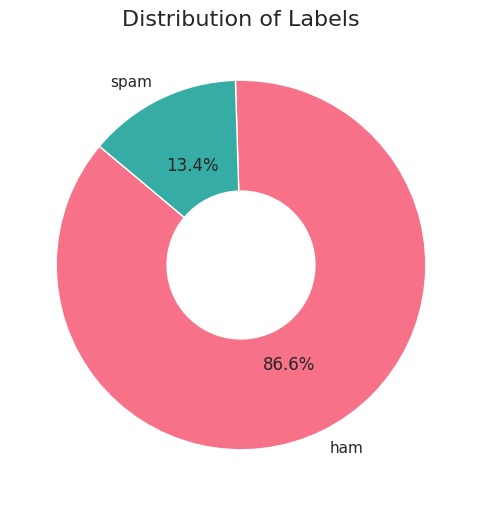

In [ ]:
def plot_pie_chart_with_seaborn(dataset, label_column):
    # Count occurrences of each label
    label_counts = dataset[label_column].value_counts()

    # Create a DataFrame for the pie chart
    df_pie = pad.DataFrame({
        label_column: label_counts.index,
        'count': label_counts.values
    })

    # Set seaborn style
    sbs.set(style="whitegrid")

    # Create a pie chart
    mtplot.figure(figsize=(6, 6))
    mtplot.pie(
        df_pie['count'],
        labels=df_pie[label_column],
        autopct='%1.1f%%',
        colors=sbs.color_palette("husl", len(df_pie)),  # Use an attractive color palette
        startangle=140,
        wedgeprops=dict(width=0.6)  # Optional: adjust the width of the wedges
    )

    # Add title
    mtplot.title('Distribution of Labels', fontsize=16)

    # Display the pie chart
    mtplot.show()

# Assuming trainn_df is your DataFrame and 'labels' is your label column
plot_pie_chart_with_seaborn(trainn_df, 'labels')

In [ ]:
def PlotWordCloud(df, class_label, title):
    # Filter the DataFrame for the given class
    text = " ".join(df[df['labels'] == class_label]['text'].values)

    # Custom stopwords
    stopwords = set(STOPWORDS)
    stopwords.update(['said', 'will', 'now', 'could'])  # Add any common words you want to exclude

    # Generate the word cloud
    wordcloud = WordCloud(width=1000, height=500,
                          background_color='white',
                          colormap='inferno',
                          stopwords=stopwords,
                          max_words=1000,
                          contour_color='steelblue',
                          contour_width=2,
                          collocations=False).generate(text)

    # Ploted wordd clouud
    mtplot.figure(figsize=(12, 6)) # Create a fig. with a specific size
    mtplot.imshow(wordcloud, interpolation='bilinear') # Render  wrd cloudd ima. using bilinear interpola-tion
    mtplot.axis('off') # Hided x and y axess
    mtplot.title(title, fontsize=16, weight='bold') # Setting title of  plot with speci. font size and bold weig.
    mtplot.show() # Displed plot on t scren

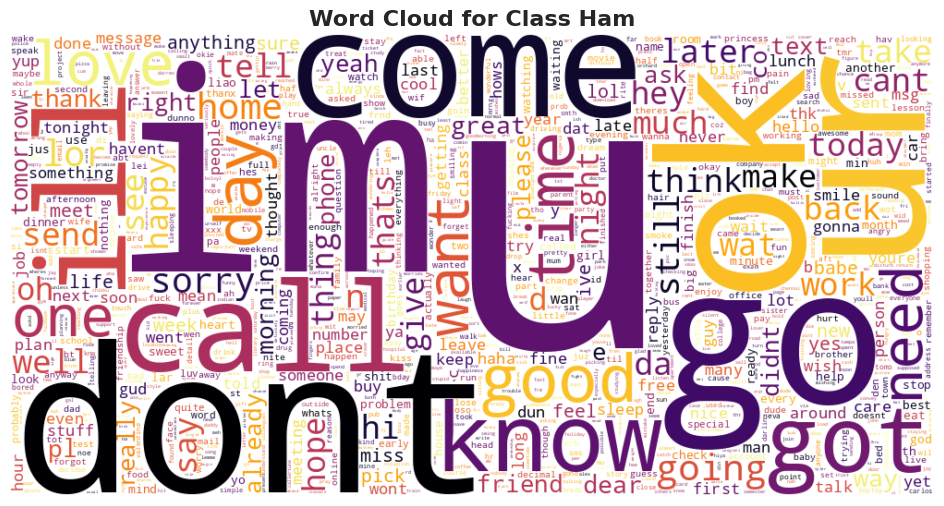

In [ ]:
# Plot word clouds for class 0
PlotWordCloud(trainn_df, 'ham', 'Word Cloud for Class Ham')

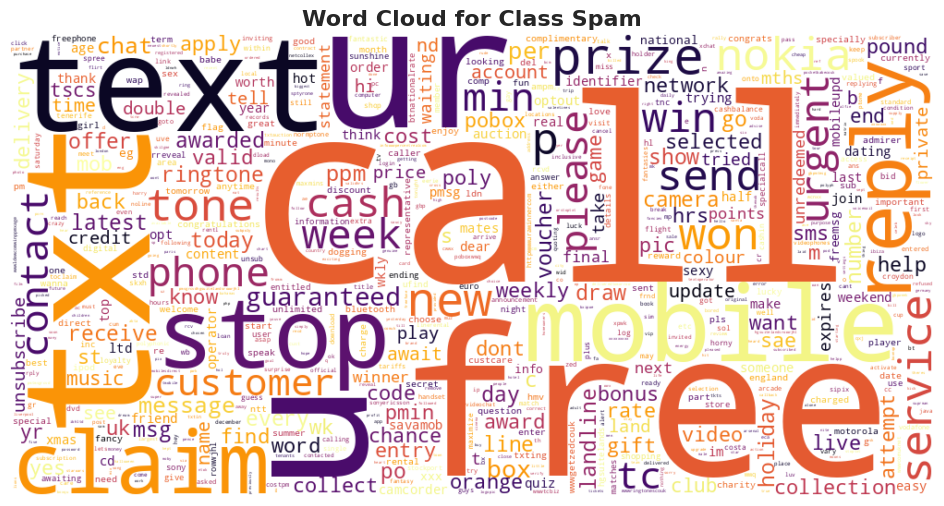

In [ ]:
PlotWordCloud(trainn_df, 'spam', 'Word Cloud for Class Spam')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


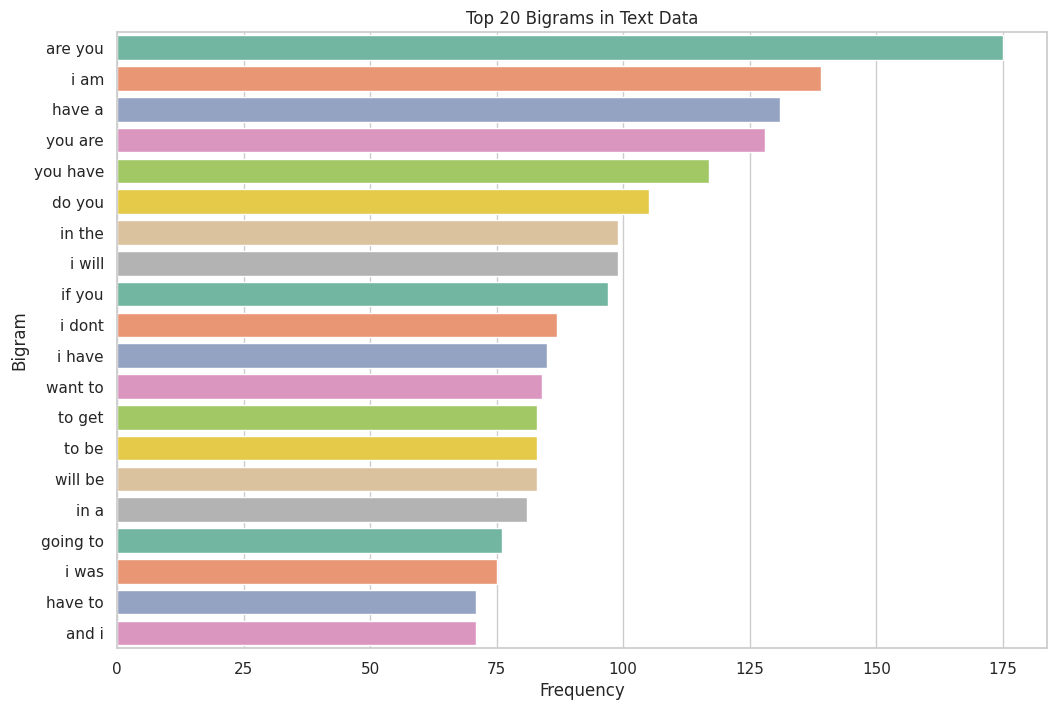

In [ ]:
# Download Nltk resour.
nltk.download('punkt')

def extract_bigrams(text_series):
    bigram_list = []
    for text in text_series:
        tokens = nltk.word_tokenize(text.lower())  # Tokenize and convert to lower case
        bigram_list.extend(bigrams(tokens))  # Extract bigrams

    return bigram_list

def plot_bigrams(bigram_list):
    # Count the frequency of each bigram
    bigram_freq = Counter(bigram_list)

    # Convert to DataFrame for visuali.
    bigrm_df = pad.DataFrame(bigram_freq.items(), columns=['Bigram', 'Count'])
    bigrm_df = bigrm_df.sort_values(by='Count', ascending=False).head(20)  # Top 20 bigrams

    # Prepare data for visualization
    bigrm_df['Bigram'] = bigrm_df['Bigram'].apply(lambda x: ' '.join(x))

    # Set seaborn style
    sbs.set(style="whitegrid")

    # Create the bar plot
    mtplot.figure(figsize=(12, 8))
    sbs.barplot(x='Count', y='Bigram', data=bigrm_df, palette='Set2', hue=None)

    # Add labels and title
    mtplot.xlabel('Frequency')
    mtplot.ylabel('Bigram')
    mtplot.title('Top 20 Bigrams in Text Data')

    # Show the plot
    mtplot.show()

# Assuming trainn_df is your DataFrame and 'text' is your text column
bigram_list = extract_bigrams(trainn_df['text'])
plot_bigrams(bigram_list);

# **LabelEncoder**

First, an instanc of  Label encoder class is created in order to do the labels encoding as it is required for further machine learning models. It is then fitted on the labels column of the train data mentioned above. A data frame in which the categorical labels are converted into a form which is easier to analyze – the integers. This switch over replaces the initial tags in the same column to make the data fit to train models conditions where numeric input is necessary. It is done to ensure that in the course of training the model will be in a position to handle the categorical data in an appropriate manner.

In [ ]:
# Initializing  Labl-encoder
Le = LabelEncoder()
# Fitting Labl-encoder on 'labels' column and transform labls
trainn_df['labels'] = Le.fit_transform(trainn_df['labels'])

# Splitting dataset

In [ ]:
# Convert labels to int if not already
trainn_df['labels'] = trainn_df['labels'].astype(int)

# Splitted data-set into tran and validaton sets (80-20 ratio)
trainn_Df, vali_Df = train_test_split(trainn_df, test_size=0.2, random_state=42)

# Load tokeniz.
toknizer = BertTokenizer.from_pretrained('ndavid/binary-qa-bert')

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/669k [00:00<?, ?B/s]

In [ ]:
# Tokeenize  data
def TokenizeFunction(examples):
    return toknizer(examples['text'], padding='max_length', truncation=True, max_length=512)

# Convert DataFrames to hug-gingface datasets
train_dtaset = Dataset.from_pandas(trainn_Df)
val_dtaset = Dataset.from_pandas(vali_Df)

# Tokenize datasets
train_dtaset = train_dtaset.map(TokenizeFunction, batched=True)
val_dtaset = val_dtaset.map(TokenizeFunction, batched=True)

# Set for-mat forr PyTorch
train_dtaset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dtaset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

Map:   0%|          | 0/4457 [00:00<?, ? examples/s]

Map:   0%|          | 0/1115 [00:00<?, ? examples/s]

The code goes on to executing the Bert model to the binary sequence clasification with the help of the Trainer apL. It defines what accuracy and F1 score mean and then what arguments of training are, such as a batch size, evaluation, and logging. After that, there is a function created, which allows one to plot training and validation loss over training phase using the data recorded. On the same plot the training as well as validation losses can be plotted in an attempt to detect signs of over fit ting during the training process.

In [ ]:
# Loaded modl
model = BertForSequenceClassification.from_pretrained('ndavid/binary-qa-bert')

config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

In [ ]:
#Defined compute_metrics function
def ComputeMetrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='binary')
    return {
        'accuracy': accuracy,
        'f1': f1
    }

The code  fetches and trains from a Trainer api a Bert model. In this role it gets to specify such training charcteristics as the batch size, number of epochs, mode of evaluation and logging, as well as check-point saving. The Trainer is then called on model, training arguments, data loader for training and evaluation, a toknizer, and a custom metric function for accuracy & F1 score. Last, the model employs these Configurationss it provides logs, evaluation factrs and Checkpoint of the entire training process.

In [ ]:
#Defined traning argu.
training_args = TrainingArguments(
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=5,
    eval_strategy='steps',
    logging_dir='./logs',
    logging_steps=10,
    save_strategy='steps',
    output_dir='./results',
)

#Defined Trainerr
trainner = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dtaset,
    eval_dataset=val_dtaset,
    tokenizer=toknizer,
    compute_metrics=ComputeMetrics
)

#Trained modl
trainner.train()

Step,Training Loss,Validation Loss,Accuracy,F1
10,0.373900,0.136770,0.954260,0.818505
20,0.102700,0.113562,0.966816,0.871080
30,0.134800,0.086905,0.971300,0.888889
40,0.069900,0.076346,0.980269,0.926174
50,0.038500,0.086461,0.979372,0.920415
60,0.046900,0.079851,0.982960,0.934708
70,0.092400,0.081558,0.979372,0.924590
80,0.044000,0.063684,0.983857,0.936170
90,0.036200,0.076801,0.982063,0.933775
100,0.020300,0.084155,0.982960,0.935593


TrainOutput(global_step=350, training_loss=0.033065636235488846, metrics={'train_runtime': 629.8119, 'train_samples_per_second': 35.384, 'train_steps_per_second': 0.556, 'total_flos': 5863429868697600.0, 'train_loss': 0.033065636235488846, 'epoch': 5.0})

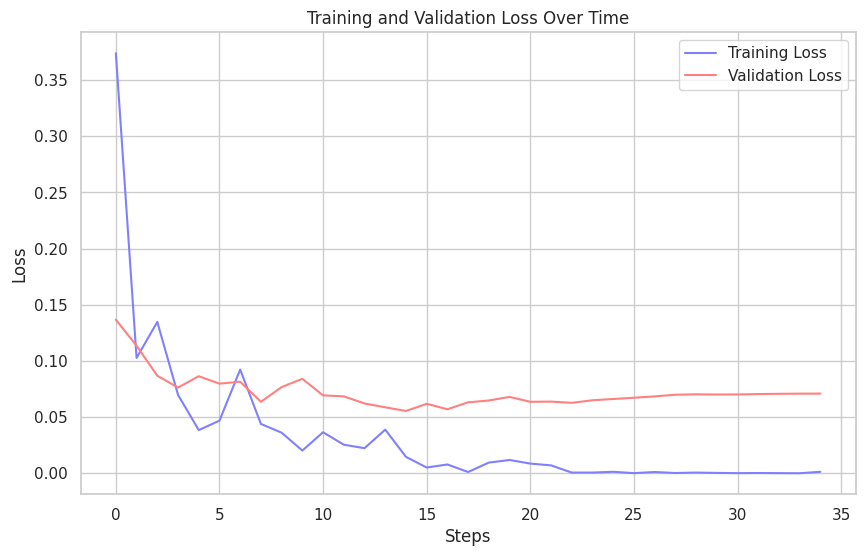

In [ ]:
def plot_training_validation_loss(trainer, figsize=(10, 6)):
    # Retrieve training history
    training_logs = trainer.state.log_history

    # Extract losses for training and evaluation
    train_loss = []
    eval_loss = []
    for log in training_logs:
        if 'loss' in log:
            train_loss.append(log['loss'])
        if 'eval_loss' in log:
            eval_loss.append(log['eval_loss'])

    # Plotting the training and validation loss
    sbs.set(style="whitegrid")
    mtplot.figure(figsize=figsize)

    # Plot training losss
    mtplot.plot(train_loss, label='Training Loss', color='#8080ff')

    # Ploted evalua. loss
    mtplot.plot(eval_loss, label='Validation Loss', color='#ff8080')

    # Enhancing the plot
    mtplot.xlabel('Steps')
    mtplot.ylabel('Loss')
    mtplot.title('Training and Validation Loss Over Time')
    mtplot.legend()
    mtplot.grid(True)

    # Show the plot
    mtplot.show()

plot_training_validation_loss(trainner)

This function, labelled as Evaluatemodel, assesses accuracy of the model for a validation data. It makes label predictions using a tokenizer/a and the model, Ultimately, it computes for other effectiveness measures such as accuracy, precision, recall, F1 score and Auc Roc. The function also creates and print confusion matrix for the classification performance and an Roc curve to prove the relationship between true +ve and false +ve rates. These visualizations and metrics help to make a complete analysis of the results obtained on the validation data by the model.

In [ ]:
def EvaluateModel(trainer, val_dtaset):
    # Make predictions
    def predict(dataset):
        encodings = toknizer(dataset['text'], padding='max_length', truncation=True, max_length=512, return_tensors='pt')
        inputs = {key: val.to(model.device) for key, val in encodings.items()}

        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits.cpu().numpy()
            predictions = nup.argmax(logits, axis=-1)
            return logits, predictions

    # Extract true labels from the dataset
    true_labels = nup.array(val_dtaset['labels'])

    # Get predictions and true labels
    logits, predictions = predict(val_dtaset)

    # Calculated metricss
    accurcy = accuracy_score(true_labels, predictions)
    precsion = precision_score(true_labels, predictions, average='binary')
    recll = recall_score(true_labels, predictions, average='binary')
    f11 = f1_score(true_labels, predictions, average='binary')
    roc_auuc = roc_auc_score(true_labels, logits[:, 1])  # Assuming binary classification

    print("Accuracy: ", accurcy)
    print("Precision: ", precsion)
    print("Recall: ", recll)
    print("F1 Score: ", f11)
    print("ROC AUC: ", roc_auuc)
    print()

    # ConfusionMatrixx
    cm = confusion_matrix(true_labels, predictions)
    mtplot.figure(figsize=(7, 5))
    sbs.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['0', '1'], yticklabels=['0', '1'])
    mtplot.xlabel('Predicted')
    mtplot.ylabel('True')
    mtplot.title('Confusion Matrix')
    mtplot.show()
    print()

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(true_labels, logits[:, 1])  # Assuming binary classification
    roc_auc = roc_auc_score(true_labels, logits[:, 1])

    # Created plot
    mtplot.figure(figsize=(7, 5))

    # Plot ROC curve
    mtplot.plot(fpr, tpr, color='#DC143C', linestyle='-', linewidth=2, label=f'ROC curve (area = {roc_auc:.2f})')

    # Ploted  diagonal (no-skill line)
    mtplot.plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=2, label='No Skill')

    # Add labels and title
    mtplot.xlabel('False Positive Rate')
    mtplot.ylabel('True Positive Rate')
    mtplot.title('Receiver Operating Characteristic (ROC) Curve')
    mtplot.legend(loc='lower right')

    # Show the plot
    mtplot.show()

Evaluation results: {'eval_loss': 0.07098174095153809, 'eval_accuracy': 0.9883408071748879, 'eval_f1': 0.9559322033898304, 'eval_runtime': 6.4973, 'eval_samples_per_second': 171.61, 'eval_steps_per_second': 2.77, 'epoch': 5.0}
Accuracy:  0.9883408071748879
Precision:  0.9657534246575342
Recall:  0.9463087248322147
F1 Score:  0.9559322033898304
ROC AUC:  0.9897869857017799



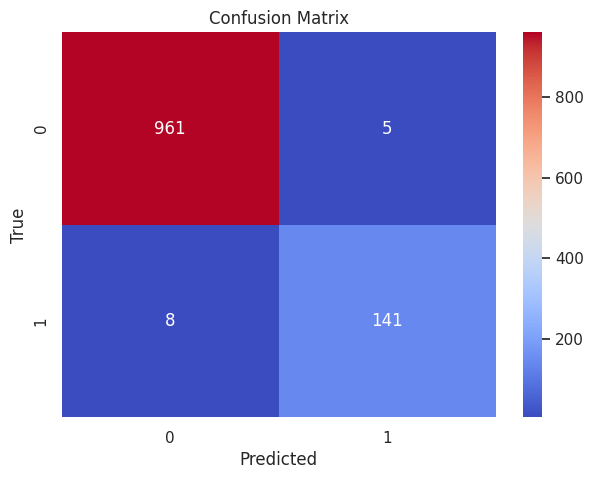

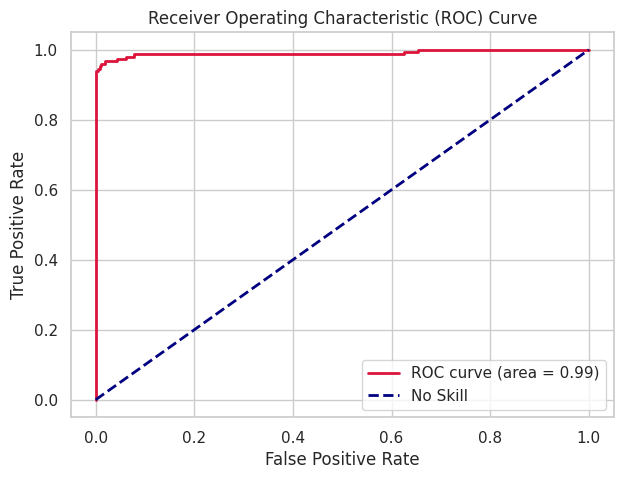

In [ ]:
# Evaluated  model on  validation data
eval_results = trainner.evaluate()
print(f"Evaluation results: {eval_results}")

# Called evaluation function
EvaluateModel(trainner, val_dtaset)